In [24]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
url = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/usda_food/database.json"

In [18]:
db = json.load(open('./database.json'))

AttributeError: 'list' object has no attribute 'head'

In [20]:
len(db)

6636

In [11]:
type(db), type(db[0])

(list, dict)

In [12]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [13]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [16]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients = nutrients[["description", "group", "units", "value"]] 
# nutrients = nutrients.reindex(columns=["description", "group", "units", "value"])

                            description        group units    value
0                               Protein  Composition     g   25.180
1                     Total lipid (fat)  Composition     g   29.200
2           Carbohydrate, by difference  Composition     g    3.060
3                                   Ash        Other     g    3.280
4                                Energy       Energy  kcal  376.000
..                                  ...          ...   ...      ...
157                              Serine  Amino Acids     g    1.472
158                         Cholesterol        Other    mg   93.000
159        Fatty acids, total saturated        Other     g   18.584
160  Fatty acids, total monounsaturated        Other     g    8.275
161  Fatty acids, total polyunsaturated        Other     g    0.830

[162 rows x 4 columns]


In [21]:
nutrients.head(10)

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00
7,"Fiber, total dietary",Composition,g,0.00
8,"Calcium, Ca",Elements,mg,673.00
9,"Iron, Fe",Elements,mg,0.64


In [22]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [23]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


C:\Users\11929\AppData\Local\Temp\ipykernel_8608\2709163366.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  _ = sns.barplot(x=pd.value_counts(info.group)[:10], y=pd.value_counts(info.group)[:10].index)
C:\Users\11929\AppData\Local\Temp\ipykernel_8608\2709163366.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  _ = sns.barplot(x=pd.value_counts(info.group)[:10], y=pd.value_counts(info.group)[:10].index)


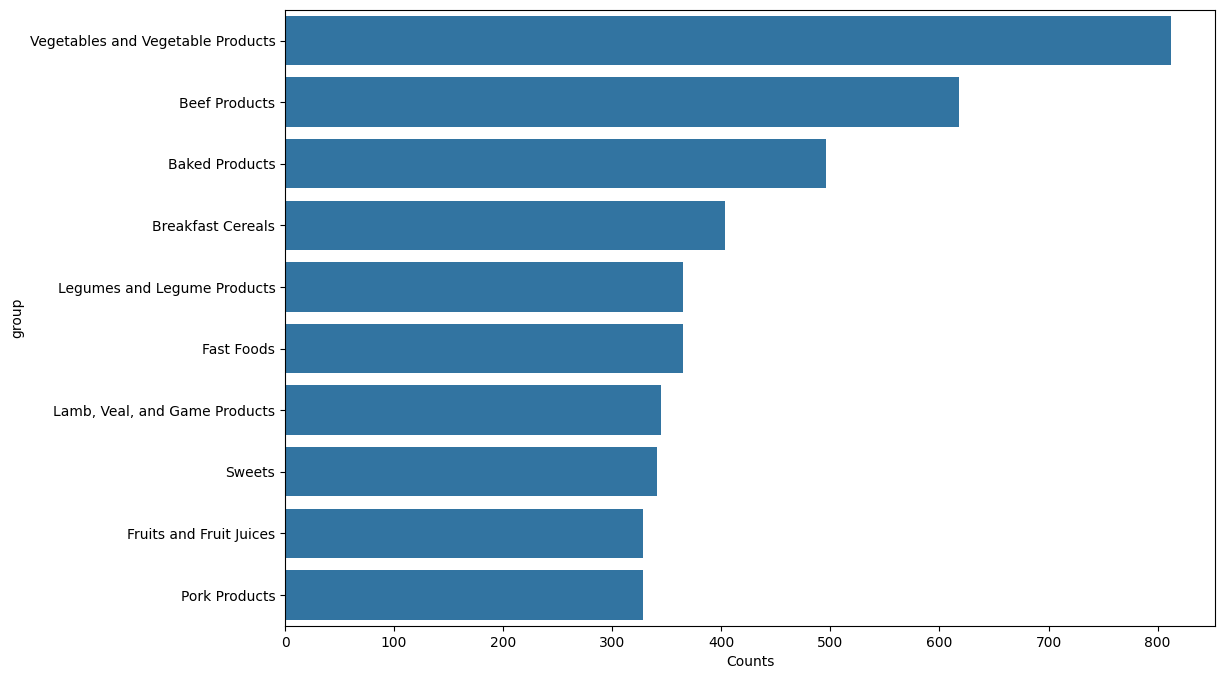

In [25]:
plt.figure(figsize=(12, 8))
_ = sns.barplot(x=pd.value_counts(info.group)[:10], y=pd.value_counts(info.group)[:10].index)
_ = plt.xlabel("Counts")

In [26]:
# for analysis of nutrients

nutrients = []

for i in db:
    fnuts = pd.DataFrame(i["nutrients"])
    fnuts['id'] = i["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [27]:
nutrients = nutrients[["description", "group", "units", "value", "id"]]
nutrients.head(10)

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008
5,Water,Composition,g,39.28,1008
6,Energy,Energy,kJ,1573.00,1008
7,"Fiber, total dietary",Composition,g,0.00,1008
8,"Calcium, Ca",Elements,mg,673.00,1008
9,"Iron, Fe",Elements,mg,0.64,1008


In [28]:
nutrients.duplicated().sum()

np.int64(14179)

In [29]:
nutrients = nutrients.drop_duplicates()

In [30]:
col_mapping = {'description' : 'food', 
               'group' : 'fgroup'}

In [31]:
info = info.rename(columns=col_mapping, copy=False)

In [32]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [33]:
col_mapping = {'description': 'nutrient',
               'group': 'nutgroup'}

In [34]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [35]:
# merging both dataframe to get a collective data
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [36]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   nutrient      375176 non-null  object 
 1   nutgroup      375176 non-null  object 
 2   units         375176 non-null  object 
 3   value         375176 non-null  float64
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [37]:
ndata.iloc[30000]

nutrient                       Folic acid
nutgroup                         Vitamins
units                                 mcg
value                                 0.0
id                                   5658
food            Ostrich, top loin, cooked
fgroup                   Poultry Products
manufacturer                             
Name: 30000, dtype: object

In [ ]:

# for count, (i, j) in enumerate(ndata.groupby(['nutrient', 'fgroup'])['value']):
#     if count < 4:
#         print(count+1, i)
#         print(j)
#         print()
#         print()

In [38]:
# We could now make a plot of median values by food group 
# and nutrient type 

result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result.index.values

array([('Adjusted Protein', 'Sweets'),
       ('Adjusted Protein', 'Vegetables and Vegetable Products'),
       ('Alanine', 'Baby Foods'), ..., ('Zinc, Zn', 'Spices and Herbs'),
       ('Zinc, Zn', 'Sweets'),
       ('Zinc, Zn', 'Vegetables and Vegetable Products')], dtype=object)

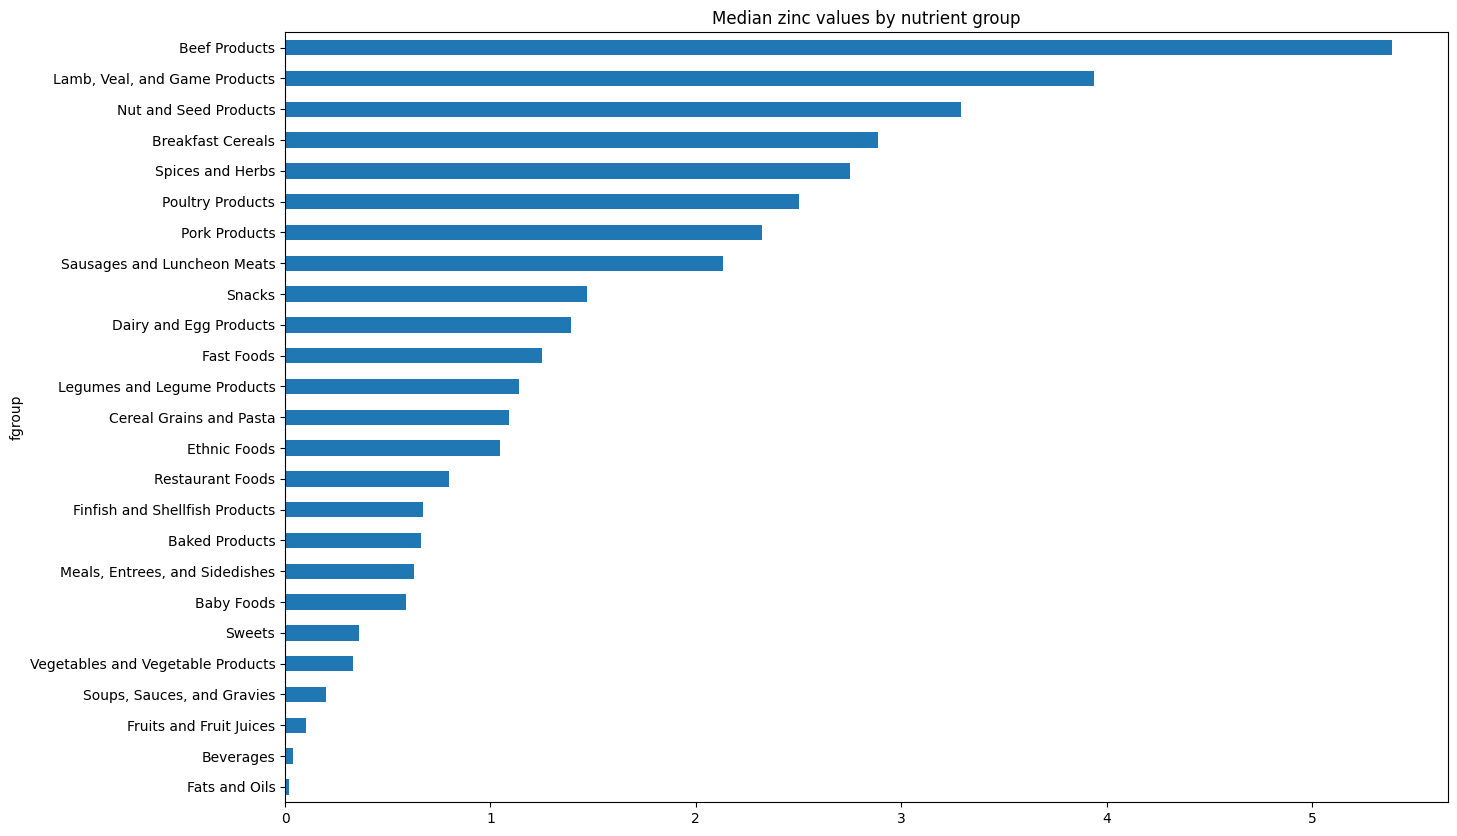

In [39]:
_ = result['Zinc, Zn'].sort_values().plot(kind="barh", figsize=(15, 10), title="Median zinc values by nutrient group")

In [ ]:
# for i, (j, k) in enumerate(ndata.groupby(['nutgroup', 'nutrient'])):
#     if i < 3:
#         print(i, j)
#         print(k.loc[k.value.idxmax(), 'food'])
#         print("\n\n")
     

In [40]:

by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_max = lambda x: x.loc[x.value.idxmax()]
get_min = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_max)[['value', 'food']]
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

C:\Users\11929\AppData\Local\Temp\ipykernel_8608\820931671.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_max)[['value', 'food']]


In [41]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 